In [1]:
import pandas as pd

df = pd.read_csv('samples_nylonGuitar_1024_Mm-R02.csv')

In [2]:
#Author: ederwander
#http://ederwander.wordpress.com/2012/03/22/chromagram/
#Date: 11/02/2012

import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal2
import math
import wave, pylab
import operator

#FFT Size
Nfft=1024

#Chroma centered on A5 = 880Hz 
A5=880

#Number of chroma bins
nbin=12

#Semitone
st=2**(1/float(nbin))

#Step
step=1024

#Used for Downsample Signal
fr=11025

#DownSample Factor
dfac=4


tunechroma1=[np.log2(A5*st**i) for i in range(nbin)] 
tunechroma1

[9.7813597135246599,
 9.8646930468579921,
 9.948026380191326,
 10.03135971352466,
 10.114693046857994,
 10.198026380191326,
 10.28135971352466,
 10.364693046857994,
 10.448026380191326,
 10.53135971352466,
 10.614693046857994,
 10.698026380191328]

In [3]:
tunechroma2=[int(np.log2(A5*st**i)) for i in range(nbin)]
tunechroma2

[9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [4]:
chroma=np.asarray(tunechroma1)-np.asarray(tunechroma2)
chroma

array([ 0.78135971,  0.86469305,  0.94802638,  0.03135971,  0.11469305,
        0.19802638,  0.28135971,  0.36469305,  0.44802638,  0.53135971,
        0.61469305,  0.69802638])

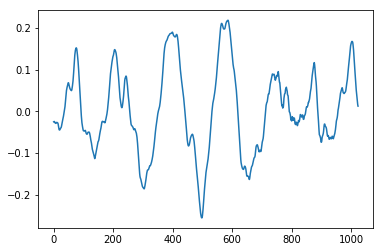

37.0

In [5]:
row = 2000
samples = np.array(df.iloc[:,:-1],dtype = np.float)
sample = samples[row,:]
plt.plot(sample)
plt.show()
df.iloc[row,-1]

In [6]:
fs = 44100

step=Nfft-step

Pxx, freqs, bins, im  = pylab.specgram(sample,Fs=fs,window=np.hamming(Nfft),NFFT=Nfft,noverlap=step,Fc=0)
freqs = freqs[1:,]

freqschroma=np.asarray(np.log2(freqs)) - np.asarray([int(np.log2(f)) for f in freqs])

nchroma=len(chroma)
nfreqschroma=len(freqschroma)

CD=np.zeros((nfreqschroma, nchroma))

for i in range(nchroma):
	CD[:,i] = np.abs(freqschroma - chroma[i])

FlipMatrix=np.flipud(CD)

min_index = []
min_value = []

for i in reversed(range(FlipMatrix.shape[0])):
	index, value = min(enumerate(FlipMatrix[i]), key=operator.itemgetter(1))
	min_index.append(index)
	min_value.append(value)

In [7]:
#Numpy Array for Chroma Scale population
CS = np.zeros((len(chroma),Pxx.shape[1]))

Magnitude= np.log(abs(Pxx[1:,]))


for i in range(CS.shape[0]):

	#Find index value in min_index list
	a = [index for index,x in enumerate(min_index) if x == i]
	
	#Numpy Array for values in each index
	AIndex = np.zeros((len(a),Pxx.shape[1]))

	t=0;
	for value in a:
		AIndex[t,:] = Magnitude[value,:]
		t=t+1

	MeanMag=[]
	for M in AIndex.T:
		MeanMag.append(np.mean(M))

	CS[i,:] = MeanMag

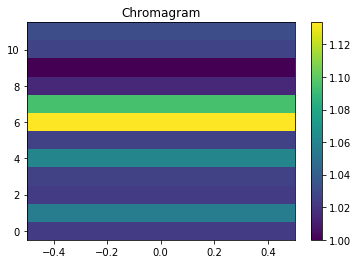

In [8]:
#normalize the chromagram array
CS= CS / CS.max()

plt.title('Chromagram')
plt.imshow(CS.astype('float64'),interpolation='nearest',origin='lower',aspect='auto')
plt.colorbar()

plt.show()

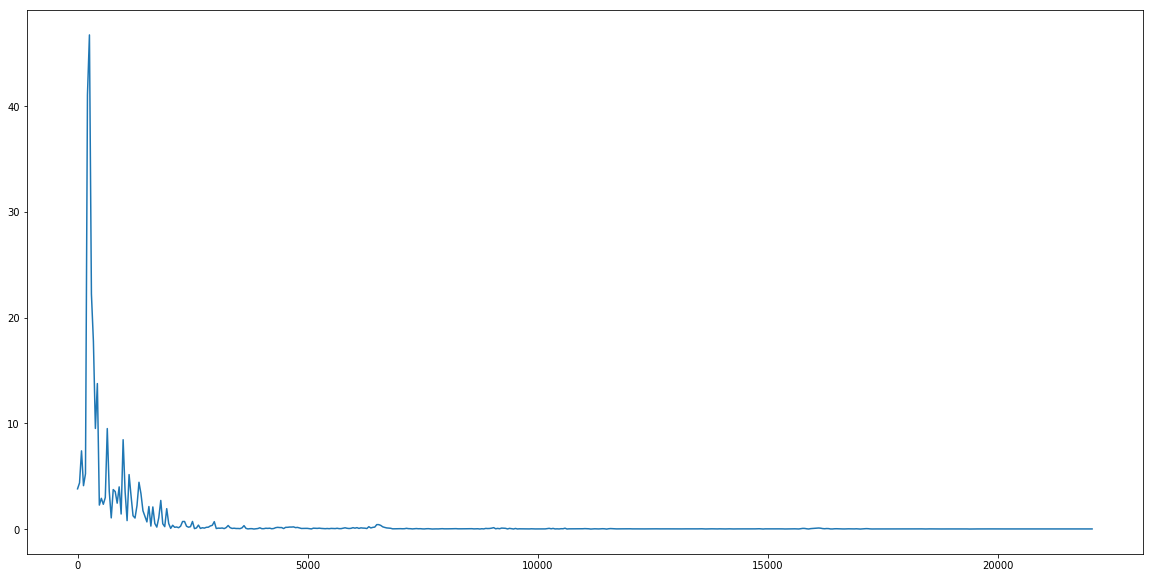

In [9]:
fftSample = np.abs(np.fft.rfft(sample))
freq = np.fft.rfftfreq(1024, 1./44100)

plt.figure(figsize=(20,10))
plt.plot(freq, fftSample)
plt.show()

In [12]:
import stft

specgram = stft.spectrogram(sample)

In [27]:
abs(specgram)

SpectrogramArray([[  5.06892890e-01,   2.21859395e-01,   4.02760690e+00],
                  [  5.52064776e-01,   1.39629351e-01,   3.75067674e+00],
                  [  2.76623607e+00,   3.39863526e+00,   4.47346137e+00],
                  ..., 
                  [  1.26619734e-02,   9.25687638e-07,   5.63785778e-03],
                  [  1.26568955e-02,   1.29012352e-06,   5.63296119e-03],
                  [  1.26617914e-02,   4.05323032e-07,   5.63769543e-03]])